In [ ]:
from PIL import Image
import numpy as np

In [ ]:
!ls

 sample_data   synthesized_1.png   synthesized_2.png  'Test image 1.png'


# Synthesized image

In [ ]:
img = Image.open('synthesized_1.png')

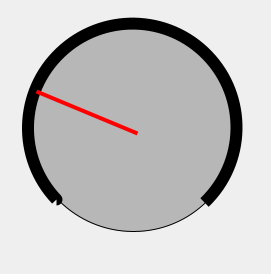

In [ ]:
img

In [ ]:
im = np.array(img)

In [ ]:
im.shape

(274, 271, 4)

In [ ]:
red = [255, 0, 0]
im2 = im[:,:,:3] # get rid of alpha channel

In [ ]:
# get each pixel's distance to red
dists = np.sqrt(np.dot((im2 - red)**2, [1,  1, 1]))
dists = dists/np.max(dists)*255 # normalize

In [ ]:
np.min(dists)

0.0

In [ ]:
np.max(dists)

255.0

In [ ]:
out2 = Image.fromarray(dists.astype('uint8'))

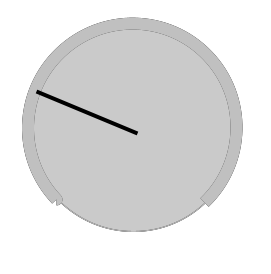

In [ ]:
out2 # black means low distance to red

In [ ]:
masked = (dists <= dists.min() + 50) # get only the pixels closest to red

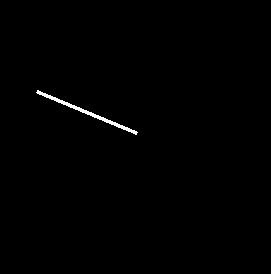

In [ ]:
Image.fromarray(masked.astype('uint8')*255)

In [ ]:
masked.shape

(274, 271)

In [ ]:
coords = np.transpose(masked.nonzero())

In [ ]:
coords.shape

(384, 2)

In [ ]:
A = np.concatenate((np.ones((coords.shape[0],1)), coords[:,0:1]), axis=1)

In [ ]:
b = coords[:,1:2]

In [ ]:
x = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)

In [ ]:
x

array([[-180.55179283],
       [   2.38439101]])

In [ ]:
x0 = x[0,0]

In [ ]:
x1 = x[1,0]

In [ ]:
newx = np.linspace(0,masked.shape[1]-1,masked.shape[1])

In [ ]:
newy = newx*x1 + x0

In [ ]:
line = np.concatenate((newx.reshape(-1,1), newy.reshape(-1,1)), axis=1)

In [ ]:
line

array([[   0.        , -180.55179283],
       [   1.        , -178.16740182],
       [   2.        , -175.78301081],
       [   3.        , -173.39861981],
       [   4.        , -171.0142288 ],
       [   5.        , -168.62983779],
       [   6.        , -166.24544678],
       [   7.        , -163.86105578],
       [   8.        , -161.47666477],
       [   9.        , -159.09227376],
       [  10.        , -156.70788275],
       [  11.        , -154.32349175],
       [  12.        , -151.93910074],
       [  13.        , -149.55470973],
       [  14.        , -147.17031873],
       [  15.        , -144.78592772],
       [  16.        , -142.40153671],
       [  17.        , -140.0171457 ],
       [  18.        , -137.6327547 ],
       [  19.        , -135.24836369],
       [  20.        , -132.86397268],
       [  21.        , -130.47958167],
       [  22.        , -128.09519067],
       [  23.        , -125.71079966],
       [  24.        , -123.32640865],
       [  25.        , -1

In [ ]:
line = line.astype('uint32')

In [ ]:
line.shape

(271, 2)

In [ ]:
newline = im.copy()

In [ ]:
for x, y in line:
  try:
    newline[x,y] = 255
  except:
    #print(x, y)
    pass

0 4294967116
1 4294967118
2 4294967121
3 4294967123
4 4294967125
5 4294967128
6 4294967130
7 4294967133
8 4294967135
9 4294967137
10 4294967140
11 4294967142
12 4294967145
13 4294967147
14 4294967149
15 4294967152
16 4294967154
17 4294967156
18 4294967159
19 4294967161
20 4294967164
21 4294967166
22 4294967168
23 4294967171
24 4294967173
25 4294967176
26 4294967178
27 4294967180
28 4294967183
29 4294967185
30 4294967187
31 4294967190
32 4294967192
33 4294967195
34 4294967197
35 4294967199
36 4294967202
37 4294967204
38 4294967207
39 4294967209
40 4294967211
41 4294967214
42 4294967216
43 4294967218
44 4294967221
45 4294967223
46 4294967226
47 4294967228
48 4294967230
49 4294967233
50 4294967235
51 4294967238
52 4294967240
53 4294967242
54 4294967245
55 4294967247
56 4294967249
57 4294967252
58 4294967254
59 4294967257
60 4294967259
61 4294967261
62 4294967264
63 4294967266
64 4294967269
65 4294967271
66 4294967273
67 4294967276
68 4294967278
69 4294967280
70 4294967283
71 4294967285
72

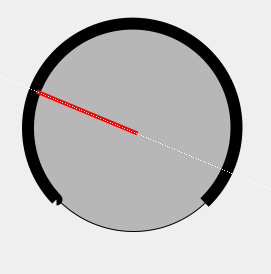

In [ ]:
Image.fromarray(newline)

In [ ]:
slope = x1

angle = np.arctan(-slope)

In [ ]:
degrees_angle = angle * 180/3.1415926

print("The angle is {} degrees".format(degrees_angle))

The angle is -67.24710195876547 degrees


# Ideal image

In [ ]:
import numpy as np
from PIL import Image
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering, KMeans, AgglomerativeClustering
from skimage.measure import label

import matplotlib.pyplot as plt

In [ ]:
!ls

 sample_data  'Test image 2.jpeg'


In [ ]:
img2 = Image.open('Test image 2.jpeg')

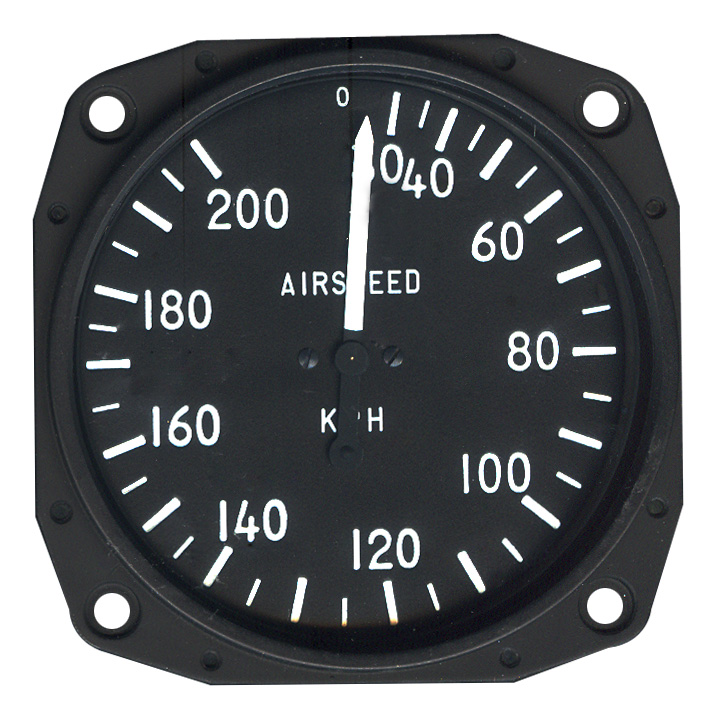

In [ ]:
img2

In [ ]:
im2 = np.array(img2)

In [ ]:
im2.shape

(709, 711, 3)

In [ ]:
#graph = image.img_to_graph(im2)

In [ ]:
#graph

<1512297x1512297 sparse matrix of type '<class 'numpy.uint8'>'
	with 9569361 stored elements in COOrdinate format>

In [ ]:
#graph.data = np.exp(-graph.data / graph.data.std())

In [ ]:
#labels = spectral_clustering(graph,)
#label_im = np.full(im2.shape, -1.0)
#label_im[mask] = labels

In [ ]:
colors = im2.reshape(-1,3)

In [ ]:
colors.shape

(504099, 3)

In [ ]:
kmeans = KMeans(n_clusters=2).fit(colors)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
map = kmeans.labels_.copy().reshape(im2.shape[0:2])

In [ ]:
map

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

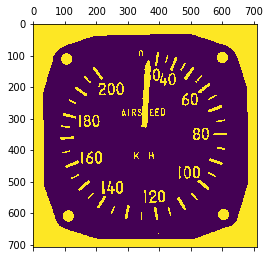

In [ ]:
plt.matshow(map)

In [ ]:
clusters, num_clusters = label(map, connectivity=1, background=-1, return_num=True)

118


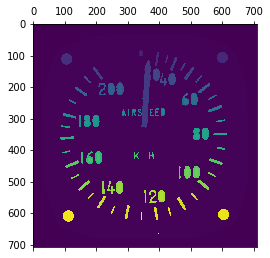

In [ ]:
print(num_clusters)
plt.matshow(clusters)

In [ ]:
clusters

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
all_clusters = [np.transpose(np.where(clusters==n)) for n in range(num_clusters)]

In [ ]:
#c1coords = np.transpose(c1.nonzero())

In [ ]:
def show_cluster(px, shape):
  arr = np.zeros(shape)
  for i,j in px:
    arr[i,j] = 255
  plt.matshow(arr)

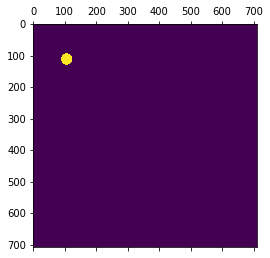

In [ ]:
show_cluster(all_clusters[17], clusters.shape)

In [ ]:
cluster_sizes = np.array([(clusters==n).sum().sum().item() for n in range(num_clusters)])

In [ ]:
cluster_sizes[17]

1020

In [ ]:
cluster_sizes[1]

115261

(array([115.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([     0.,   3750.,   7500.,  11250.,  15000.,  18750.,  22500.,
         26250.,  30000.,  33750.,  37500.,  41250.,  45000.,  48750.,
         52500.,  56250.,  60000.,  63750.,  67500.,  71250.,  75000.,
         78750.,  82500.,  86250.,  90000.,  93750.,  97500., 101250.,
        105000., 108750., 112500., 116250., 120000., 123750., 127500.,
        131250., 135000., 138750., 142500., 146250., 150000.]),
 <a list of 40 Patch objects>)

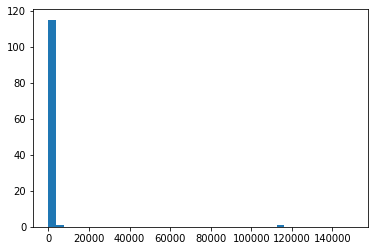

In [ ]:
plt.hist(cluster_sizes, range=(0, 150000), bins=40)

In [ ]:
np.where(cluster_sizes > 1000)

(array([  1,   2,  14,  17,  21, 114, 115]),)

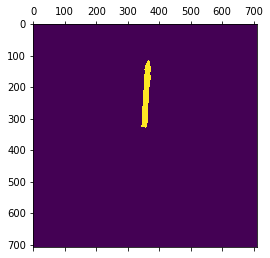

In [ ]:
show_cluster(all_clusters[21], clusters.shape)

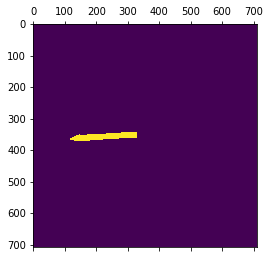

In [ ]:
show_cluster(np.concatenate((all_clusters[21][:,1:2], all_clusters[21][:,0:1]), axis=1), clusters.shape)

In [ ]:
750*750

562500

In [ ]:
def do_lg(arr):
  A = np.concatenate((np.ones((arr.shape[0],1)), arr[:,0:1]), axis=1)
  b = arr[:,1:2]
  try:
    x = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)
  except:
    x = np.array([[0],[0]])
  return x

In [ ]:
x_21 = do_lg(all_clusters[21])

In [ ]:
def get_lg_err(arr, x0, x1):
  # mean of distance from point to line
  x = arr[:,0:1]
  y = arr[:,1:2]
  # difference between given y and the y predicted from x
  y_hat = x1 * x + x0
  y_err = (y - y_hat)**2
  # difference between given x and the x predicted from y
  # y = x1 * x + x0 --> x = (y - x0) / x1
  x_hat = (y - x0) / x1
  x_err = (x - x_hat)**2

  err = (x_err + y_err)**.5 / 2

  mean_err = np.sum(err)/arr.shape[0]

  return mean_err

In [ ]:
x_21

array([[ 3.72073426e+02],
       [-5.93352607e-02]])

In [ ]:
x_21[0,0]

372.07342620785937

In [ ]:
x_21[1,0]

-0.059335260664637166

In [ ]:
get_lg_err(all_clusters[21], x_21[0,0], x_21[1,0])

38.92360970009965

In [ ]:
8189**.5

90.49309365912958

In [ ]:
# function to print a line over the image
def print_line(x0, x1, orig_img):
  img = orig_img#.copy()
  newx = np.linspace(0,orig_img.shape[1]-1,orig_img.shape[1])
  newy = x1 * newx + x0
  line = np.concatenate((newx.reshape(-1,1), newy.reshape(-1,1)), axis=1).astype('uint32')
  for x,y in line:
    try:
      img[x,y] = np.array([255, 0, 0])
    except:
      pass  # the line extends out of bounds of the image

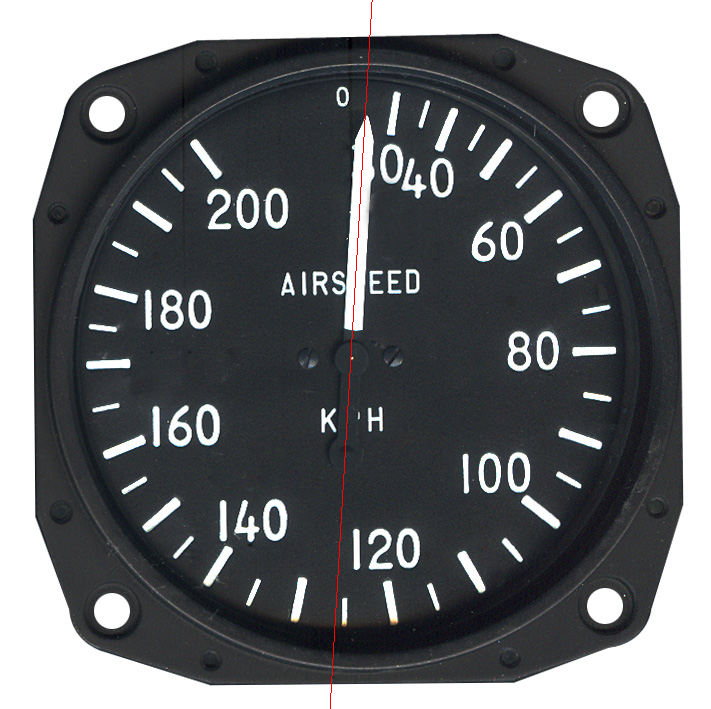

In [ ]:
im2copy = im2.copy()
print_line(x_21[0,0], x_21[1,0], im2copy)
Image.fromarray(im2copy.astype('uint8'))

In [ ]:
np.corrcoef(all_clusters[21].transpose())

array([[ 1.        , -0.54763283],
       [-0.54763283,  1.        ]])

In [ ]:
np.corrcoef(all_clusters[17].transpose()) # a circle

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.corrcoef(np.concatenate((all_clusters[21][:,1:2], all_clusters[21][:,0:1]), axis=1).transpose())

array([[ 1.        , -0.54763283],
       [-0.54763283,  1.        ]])

In [ ]:
np.corrcoef([[1, 2, 1, 2,1,2], [1,2,3,4,5,6]])

array([[1.        , 0.29277002],
       [0.29277002, 1.        ]])

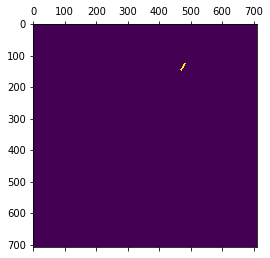

In [ ]:
show_cluster(all_clusters[22], clusters.shape)

In [ ]:
np.corrcoef(all_clusters[22].transpose())

array([[ 1.        , -0.91952066],
       [-0.91952066,  1.        ]])

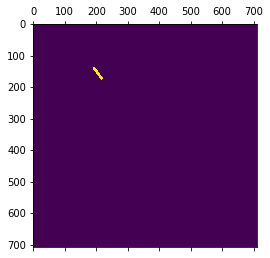

In [ ]:
show_cluster(all_clusters[23], clusters.shape)

In [ ]:
np.corrcoef(all_clusters[23].transpose())

array([[1.        , 0.92355951],
       [0.92355951, 1.        ]])

In [ ]:
# do all the lines

In [ ]:
regressions = [do_lg(all_clusters[i]) for i in range(num_clusters)]

In [ ]:
def get_corrcoef(cl):
  try:
    c = np.corrcoef(cl)[0,1]
  except:
    c = 0
  return c

In [ ]:
corrcoefs = [get_corrcoef(all_clusters[i].transpose()) for i in range(num_clusters)]

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: Runt

In [ ]:
all_lines_img = im2.copy()

for x,c in zip(regressions, corrcoefs):
  if abs(c) > .5:
    print_line(x[0,0], x[1,0], all_lines_img)
  else:
    pass
    #print("rejected")

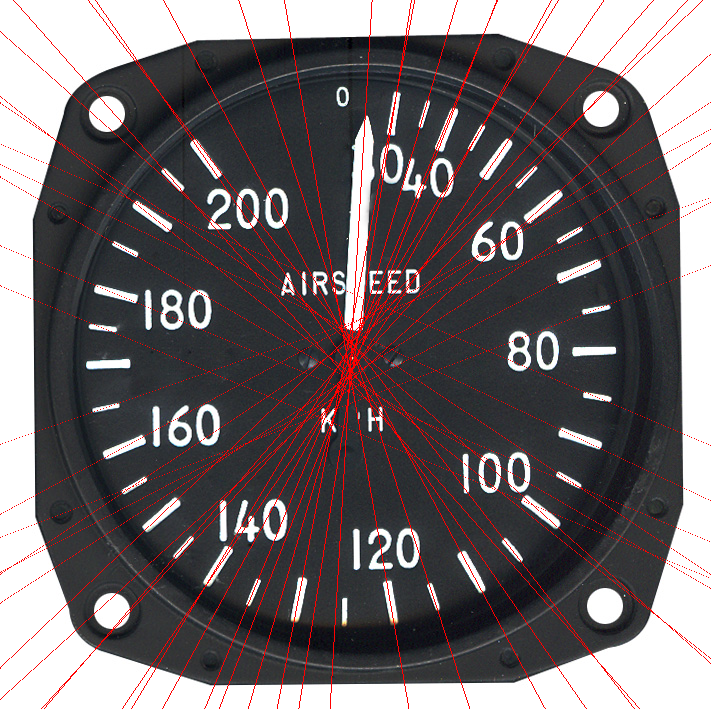

In [ ]:
Image.fromarray(all_lines_img.astype('uint8'))

# Neatly reimplement

In [ ]:
def get_color_clusters(im, n_clusters=2):
  # im: numpy array of a 3-channel image
  colors = im.reshape(-1,3)  # a list of all the pixel colors in the image
  kmeans = KMeans(n_clusters=n_clusters).fit(colors)
  # ^ KMeans() is from sklearn.cluster
  map = kmeans.labels_.copy().reshape(im.shape[0:2])  # an image where each pixel is replaced by its kmeans label
  clusters, num_clusters = label(map, connectivity=1, background=-1, return_num=True)  # an image where each pixel is replaced by its cluster label
  # ^ label() is from skimage.measure
  all_clusters = [np.transpose(np.where(clusters==n)) for n in range(num_clusters)]  # a list of the coordinates of pixels in each cluster
  return all_clusters


In [ ]:
def get_line_of_cluster(arr):  # TODO: make more robust
  # arr: a list of the coordinates in the cluster
  A = np.concatenate((np.ones((arr.shape[0],1)), arr[:,0:1]), axis=1)
  b = arr[:,1:2]
  try:
    x = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)
  except:
    x = np.array([[0],[0]])
  return x  # b and m of the line

def get_line_of_cluster_err(arr, x0, x1):
  # mean of distance from point to line
  x = arr[:,0:1]
  y = arr[:,1:2]
  # difference between given y and the y predicted from x
  y_hat = x1 * x + x0
  y_err = (y - y_hat)**2
  # difference between given x and the x predicted from y
  # y = x1 * x + x0 --> x = (y - x0) / x1
  x_hat = (y - x0) / x1
  x_err = (x - x_hat)**2

  # perpendicular distance from line to each point in the cluster
  dist = (x_err + y_err)**.5 / 2
  mean_dist = np.sum(dist)/arr.shape[0]

  # length of diagonal of bounding box of line
  cluster_len = ((np.max(x) - np.min(x))**2 + (np.max(y) - np.min(y))**2) ** .5

  err = mean_dist / cluster_len

  return err

In [ ]:
# function to print a line over the image
def print_line(x0, x1, img):
  newx = np.linspace(0,orig_img.shape[1]-1,orig_img.shape[1])
  newy = x1 * newx + x0  # these might be oob of the image
  line = np.concatenate((newx.reshape(-1,1), newy.reshape(-1,1)), axis=1).astype('uint32')
  for x,y in line:
    try:
      img[x,y] = np.array([255, 0, 0])
    except:
      pass  # the line extends out of bounds of the image